In [1]:
import matplotlib.pylab as plt
import numpy as np
import os
import tensorflow as tf
import nibabel as nib
from models import unet
from utils import min_max_normalization

In [2]:
def pad_volume(data,multiple):
    _,d2,d3 = data.shape
    rem2 = multiple - d2%multiple 
    rem3 = multiple - d3%multiple
    return np.pad(data,pad_width = ((0,0),(0,rem2),(0,rem3)))

In [3]:
data_path = "C:\\Users\\rober\\PycharmProjects\\unet-segmentation\\Data\\Original"
test_files = "C:\\Users\\rober\\PycharmProjects\\unet-segmentation\\Data\\test-set.txt"
test_files = np.loadtxt(test_files,dtype = str)
test_files = [os.path.join(data_path, f + ".gz") for f in test_files]
multiple = 2**4 # the network has 4 max-pooling layers

OSError: C:\Users\rober\PycharmProjects\unet-segmentation\Data\test-set.txt not found.

In [4]:
model_name = "unet_multitask.h5"
model = unet(input_shape=(None, None, 1))
model.load_weights(model_name)

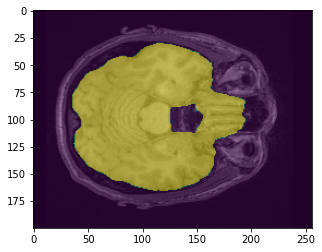

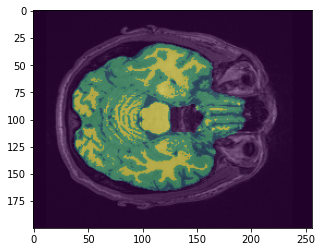

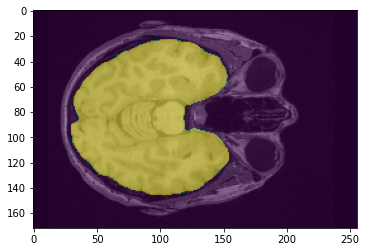

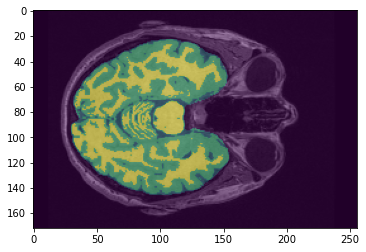

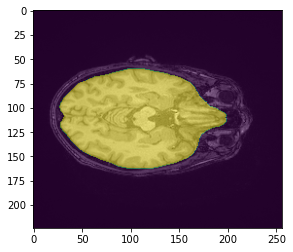

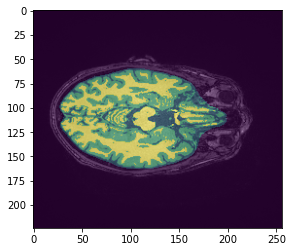

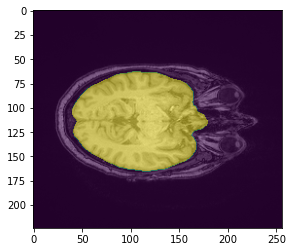

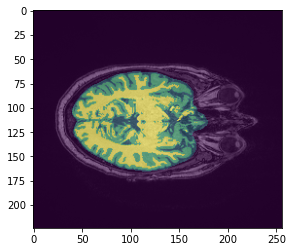

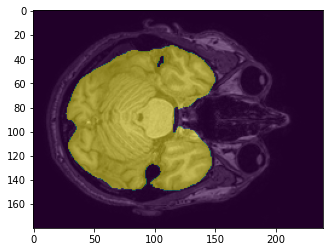

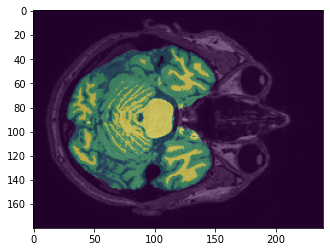

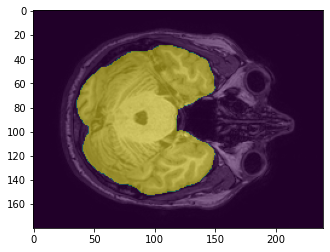

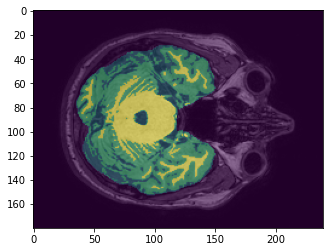

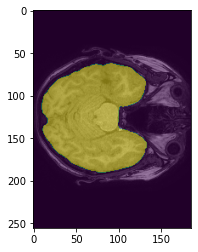

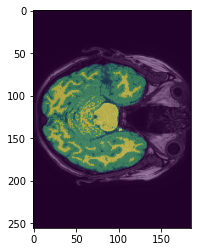

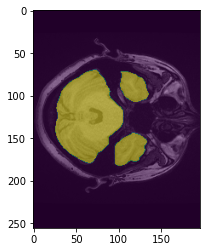

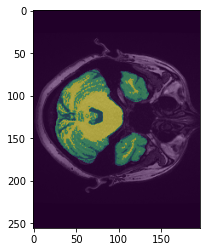

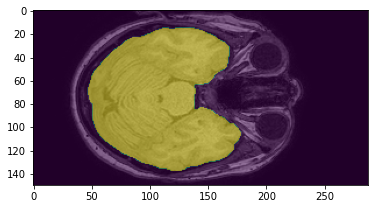

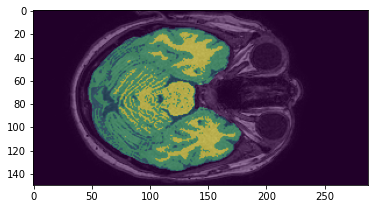

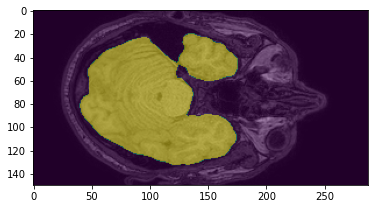

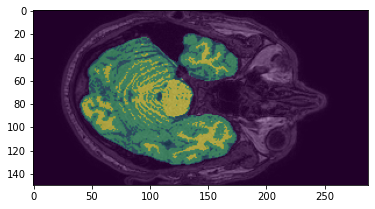

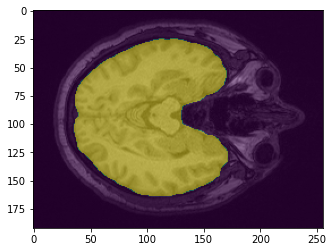

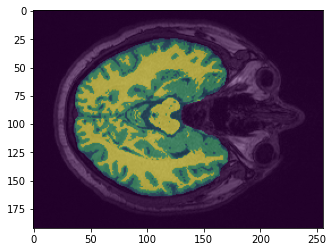

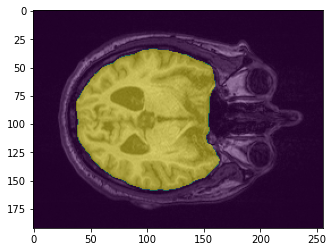

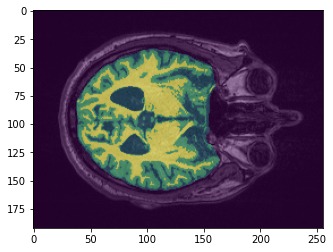

In [6]:
idx = 120
for ii in test_files:
    data = nib.load(ii).get_fdata()
    data = min_max_normalization(data)
    data = data.transpose(2,0,1) # axial slices first
    H,W,Z = data.shape
    data_padded = pad_volume(data,16)
    pred01,pred02 = model.predict(data_padded[:,:,:,np.newaxis])
    pred01 = pred01[:,:W,:Z,0] > 0.5
    pred02 = pred02[:,:W,:Z,:].argmax(axis = -1)*pred01
    plt.figure()
    plt.imshow(data[idx], cmap = "gray")
    plt.imshow(pred01[idx], alpha = 0.5)
    plt.show()
    plt.figure()
    plt.imshow(data[idx], cmap = "gray")
    plt.imshow(pred02[idx], alpha = 0.5)
    plt.show()    